In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0.5, 0, 'Class')

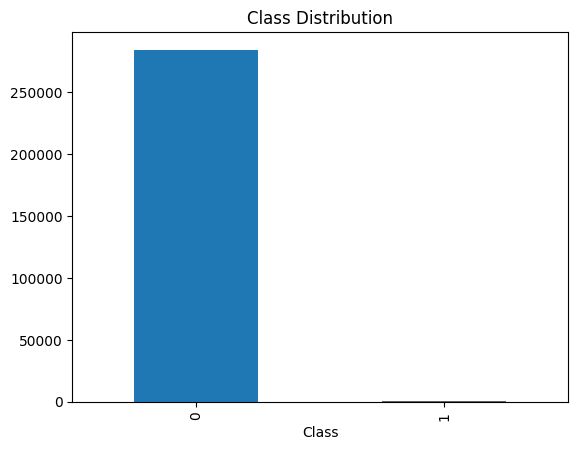

In [32]:
data['Class'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')

In [33]:
data.shape 
data = data.sample(n=20000)
data['Class'].value_counts()

Class
0    19958
1       42
Name: count, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [35]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # Handles class imbalance
    random_state=42,
    n_jobs=-1  # Uses all CPU cores
)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
import joblib
joblib.dump(rf_model, 'rf_model.joblib')  # Save to disk

['rf_model.joblib']

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = rf_model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


class_report = classification_report(y_test, y_pred)
print("\nClassification Result:")
print(class_report)


accuracy = rf_model.score(X_test, y_test)
print("Accuracy of the model:", accuracy)

Confusion Matrix:
[[3992    0]
 [   2    6]]

Classification Result:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3992
           1       1.00      0.75      0.86         8

    accuracy                           1.00      4000
   macro avg       1.00      0.88      0.93      4000
weighted avg       1.00      1.00      1.00      4000

Accuracy of the model: 0.9995


In [38]:
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

# Separate majority and minority classes
df_majority = X_train[y_train == 0]
df_minority = X_train[y_train == 1]

# Oversample minority class
df_minority_oversampled = resample(
    df_minority,
    replace=True,  # sampling with replacement
    n_samples=len(df_majority),  # match majority class size
    random_state=42
)

# Combine classes
X_oversampled = pd.concat([df_majority, df_minority_oversampled])
y_oversampled = pd.Series([0]*len(df_majority) + [1]*len(df_minority_oversampled))

# Train model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_oversampled, y_oversampled)

# Evaluate
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3992    0]
 [   2    6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3992
           1       1.00      0.75      0.86         8

    accuracy                           1.00      4000
   macro avg       1.00      0.88      0.93      4000
weighted avg       1.00      1.00      1.00      4000



In [39]:
from sklearn.utils import resample

# Separate classes
df_majority = X_train[y_train == 0]
df_minority = X_train[y_train == 1]

# Undersample majority class
df_majority_undersampled = resample(
    df_majority,
    replace=False,  # without replacement
    n_samples=len(df_minority),  # match minority class size
    random_state=42
)

# Combine classes
X_undersampled = pd.concat([df_majority_undersampled, df_minority])
y_undersampled = pd.Series([0]*len(df_majority_undersampled) + [1]*len(df_minority))

# Train model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_undersampled, y_undersampled)

# Evaluate
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3984    8]
 [   2    6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3992
           1       0.43      0.75      0.55         8

    accuracy                           1.00      4000
   macro avg       0.71      0.87      0.77      4000
weighted avg       1.00      1.00      1.00      4000



In [40]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Improved manual SMOTE implementation
def manual_smote(X, y, k=5, sampling_strategy='auto'):
    """
    Manual implementation of SMOTE for oversampling minority class
    
    Parameters:
    X : Features (DataFrame or array-like)
    y : Target (Series or array-like)
    k : Number of nearest neighbors to consider
    sampling_strategy : 'auto' to balance classes, or float for desired ratio
    
    Returns:
    X_resampled, y_resampled : Resampled arrays
    """
    # Convert to numpy arrays
    X = np.array(X)
    y = np.array(y)
    
    # Get class counts
    unique_classes, class_counts = np.unique(y, return_counts=True)
    
    if len(unique_classes) != 2:
        raise ValueError("SMOTE requires exactly two classes")
    
    # Identify minority and majority classes
    if class_counts[0] < class_counts[1]:
        minority_class, majority_class = unique_classes[0], unique_classes[1]
    else:
        minority_class, majority_class = unique_classes[1], unique_classes[0]
    
    # Split data
    X_min = X[y == minority_class]
    X_maj = X[y == majority_class]
    
    n_minority = len(X_min)
    n_majority = len(X_maj)
    
    # Determine synthetic samples needed
    if sampling_strategy == 'auto':
        n_synthetic = n_majority - n_minority
    else:
        n_synthetic = int(n_minority * sampling_strategy) - n_minority
    
    # Handle edge cases
    if n_minority == 0:
        return X, y
    if n_minority == 1:  # Duplicate if only one sample
        synthetic_samples = [X_min[0]] * n_synthetic
    else:
        # Adjust k to available neighbors
        k_adj = min(k, n_minority - 1)
        knn = NearestNeighbors(n_neighbors=k_adj)
        knn.fit(X_min)
        
        synthetic_samples = []
        for i in range(n_minority):
            # Find nearest neighbors
            nn_indices = knn.kneighbors([X_min[i]], return_distance=False)[0]
            
            # Generate required samples
            for _ in range(n_synthetic // n_minority):
                nn_index = np.random.choice(nn_indices)
                diff = X_min[nn_index] - X_min[i]
                gap = np.random.random()
                synthetic_samples.append(X_min[i] + gap * diff)
    
    # Combine results
    X_resampled = np.vstack([X_maj, X_min, np.array(synthetic_samples)])
    y_resampled = np.concatenate([
        np.full(n_majority, majority_class),
        np.full(n_minority, minority_class),
        np.full(len(synthetic_samples), minority_class)
    ])
    
    return X_resampled, y_resampled

# Load and prepare data
data = pd.read_csv('creditcard.csv')  # Replace with your actual data path
X = data.drop('Class', axis=1)
y = data['Class']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply manual SMOTE
X_resampled, y_resampled = manual_smote(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Initialize and train model
rf_model = RandomForestClassifier(
    n_estimators=150,
    class_weight='balanced',
    max_depth=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_resampled, y_resampled)

# Evaluate model
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Class distribution after SMOTE:
0    227451
1    227338
Name: count, dtype: int64


C:\Users\88018\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\88018\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Confusion Matrix:
[[56780    84]
 [   11    87]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.51      0.89      0.65        98

    accuracy                           1.00     56962
   macro avg       0.75      0.94      0.82     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9840546868719351


In [41]:
# ... (your existing code remains unchanged above this line) ...

# Define prediction function
def predict_fraud(input_data):
    """
    Predict fraud labels for input data using the trained model.
    
    Parameters:
    input_data : 2D array-like (list, numpy array, or DataFrame) with shape (n_samples, 30)
    
    Returns:
    predictions : array of class labels (0 or 1) for each input sample
    """
    # Convert input to numpy array and ensure correct dimensions
    input_array = np.array(input_data)
    
    # Handle single sample input (convert to 2D)
    if input_array.ndim == 1:
        input_array = input_array.reshape(1, -1)
    
    # Verify feature dimensions
    if input_array.shape[1] != 30:
        raise ValueError(f"Input must have exactly 30 features. Received {input_array.shape[1]} features")
    
    # Generate and return predictions
    return rf_model.predict(input_array)

# Example usage:
# new_data = [[1, 2, 3, ...], [4, 5, 6, ...]]  # 2D array with 30 features per sample
# predictions = predict_fraud(new_data)

In [45]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the model (assuming it's already trained)
# If not, retrain using your best pipeline from earlier

# === Load test transactions ===
test_data = pd.read_csv('test_transactions.csv')



# Predict
y_pred = rf_model.predict(test_data)
y_proba = rf_model.predict_proba(test_data)[:, 1]

threshold = 0.15  # Lower threshold to detect more frauds

for idx, prob in enumerate(y_proba):
    pred = 1 if prob >= threshold else 0
    label = "🔴 FRAUD" if pred == 1 else "🟢 LEGIT"
    print(f"Transaction {idx+1:02d}: {label} | Fraud Probability: {prob*100:.2f}%")


# Print results per sample
print("Prediction Results:\n")
for idx, (pred, prob) in enumerate(zip(y_pred, y_proba)):
    label = "🔴 FRAUD" if pred == 1 else "🟢 LEGIT"
    print(f"Transaction {idx+1:02d}: {label} | Fraud Probability: {prob*100:.2f}%")


Transaction 01: 🟢 LEGIT | Fraud Probability: 2.17%
Transaction 02: 🔴 FRAUD | Fraud Probability: 36.80%
Transaction 03: 🟢 LEGIT | Fraud Probability: 1.03%
Transaction 04: 🟢 LEGIT | Fraud Probability: 14.85%
Transaction 05: 🔴 FRAUD | Fraud Probability: 16.89%
Transaction 06: 🟢 LEGIT | Fraud Probability: 13.33%
Transaction 07: 🟢 LEGIT | Fraud Probability: 0.78%
Prediction Results:

Transaction 01: 🟢 LEGIT | Fraud Probability: 2.17%
Transaction 02: 🟢 LEGIT | Fraud Probability: 36.80%
Transaction 03: 🟢 LEGIT | Fraud Probability: 1.03%
Transaction 04: 🟢 LEGIT | Fraud Probability: 14.85%
Transaction 05: 🟢 LEGIT | Fraud Probability: 16.89%
Transaction 06: 🟢 LEGIT | Fraud Probability: 13.33%
Transaction 07: 🟢 LEGIT | Fraud Probability: 0.78%


C:\Users\88018\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\88018\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


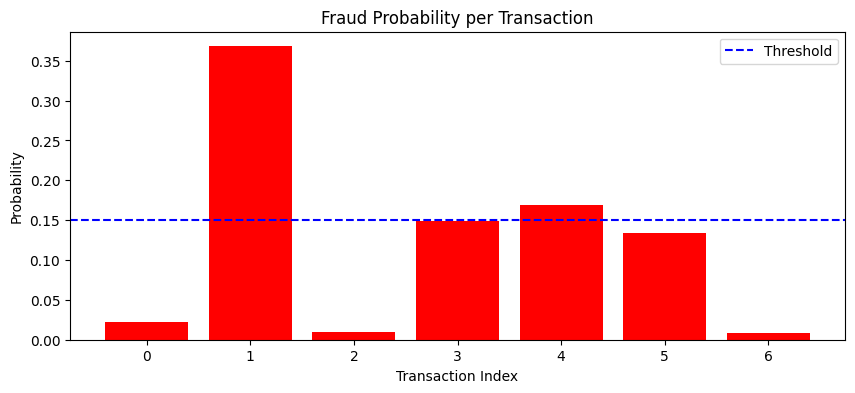

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.bar(range(len(y_proba)), y_proba, color='red')
plt.axhline(y=threshold, color='blue', linestyle='--', label='Threshold')
plt.title("Fraud Probability per Transaction")
plt.xlabel("Transaction Index")
plt.ylabel("Probability")
plt.legend()
plt.show()
